In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
def take_and_clean(filename, keyword, print_info=False):
    raw = pd.read_json(f'./data/{filename}.json')
    ranks = raw[['creatorName', 'totalScore']]
    ranks = ranks[ranks['creatorName'].str.contains(keyword)]
    ranks = ranks[ranks['creatorName'].str.contains('GG')]
    if print_info:
        ranks.info()
    return ranks


In [123]:
NAMES = ['MUN', 'THR', 'OGR', 'SHM', 'BRW', 'WRL']

def collect_scores(ranks):
    by_units = []
    for name in NAMES:
        units = ranks[ranks['creatorName'].str.contains(name)]['totalScore'] * 100
        units.reset_index(drop=True, inplace=True)
        by_units.append(units)

    unit_scores = pd.concat(by_units,
        ignore_index=True, axis=1)
    unit_scores.columns = NAMES
    return unit_scores

def print_score_data(unit_scores):
    result = []
    for name in NAMES:
        units = unit_scores[name]
        result.append([name, units.mean(), units.median()])

    result.sort(key=lambda x: x[1], reverse=True)
    print('NAME - MEAN  -- MED')
    for line in result:
        print(f'{line[0]} -- {line[1]: <5.2f} -- {line[2]:.2f}')

def boxplot_score(unit_scores):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=unit_scores)

NAME - MEAN  -- MED
WRL -- 2494.59 -- 2480.29
SHM -- 1364.82 -- 1203.23
THR -- 793.56 -- 789.42
BRW -- 567.39 -- 620.46
MUN -- 374.26 -- 516.49
OGR -- 10.07 -- -37.20


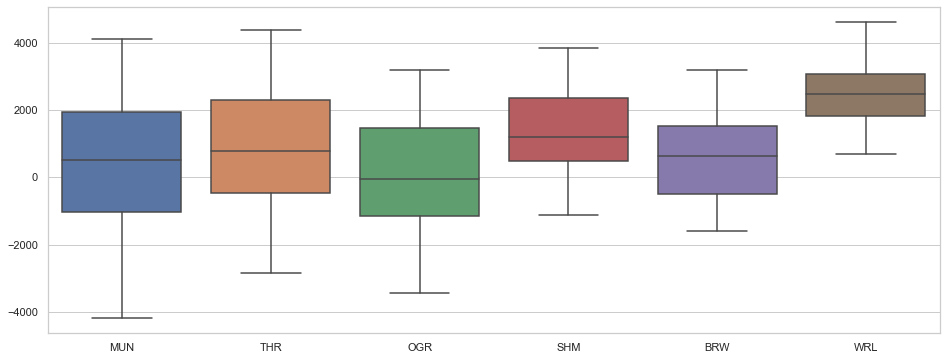

In [124]:
# Version 0.8.23
# team by 3
# C point without assault
front_team3_v0 = take_and_clean('rankingsC', '-C-', False)
front_team3_v0_scores = collect_scores(front_team3_v0)
print_score_data(front_team3_v0_scores)
boxplot_score(front_team3_v0_scores)